In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans


In [44]:
csv_data = r"insurance_with_null.csv"
df = pd.read_csv(csv_data)
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [21]:
df=df[df['smoker'] != '?']
df=df[df['region'] != 'bucheon']
print("Filtered DataFrame:")
print(df)

Filtered DataFrame:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1324 rows x 7 columns]


In [45]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df['smoker'].values)
print(y)

[2 1 1 ... 1 1 2]


In [46]:
X=df[['age','sex','bmi','children','region','charges']].values

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe=OneHotEncoder(categories='auto',drop='first')
c_tranf=ColumnTransformer([('onehot',ohe,[1,4])],remainder='passthrough')
X=c_tranf.fit_transform(X)
print(X.shape,'\n',X)

(1338, 9) 
 [[0.0 0.0 0.0 ... 27.9 0.0 16884.924]
 [1.0 0.0 0.0 ... 33.77 1.0 1725.5523]
 [1.0 0.0 0.0 ... 33.0 3.0 4449.462]
 ...
 [0.0 0.0 0.0 ... 36.85 0.0 1629.8335]
 [0.0 0.0 0.0 ... 25.8 0.0 2007.945]
 [0.0 0.0 1.0 ... 29.07 0.0 29141.3603]]


In [50]:
from sklearn.impute import SimpleImputer
import numpy as np
imr=SimpleImputer(missing_values=np.nan,strategy='mean')
imr=imr.fit(X)
X=imr.transform(X)
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [55]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

# K-means 모델 생성
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# 클러스터 할당 결과 추가
df['cluster'] = kmeans.labels_

print("DataFrame with Cluster Assignments:")
print(df[['age', 'bmi', 'cluster']].head())



plt.scatter(df['bmi'], df['age'], c=df['cluster'], marker='o', edgecolor='black', s=50)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 2], scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], 
            s=250, marker='*', c='red', label='Centroids')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


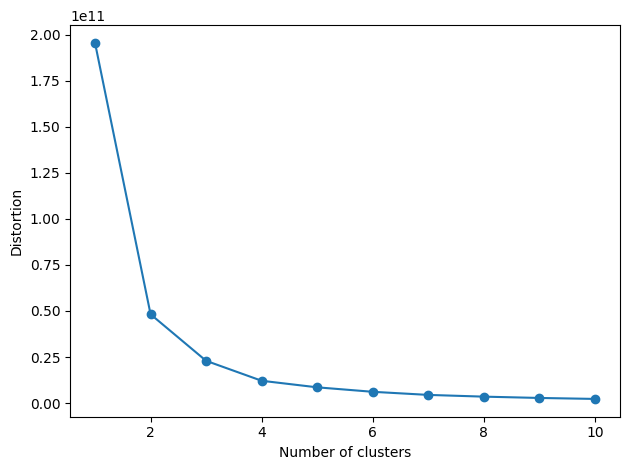

In [51]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

해당 그래프 결과, 
elbow, 실루엣 분석(within cluster은 작게, )

within줄이고, between늘리는 방향으로만 잡으면 클러스터 2가 가장 좋아보인다

outlier제거 안했지만, 
오타 고치고 빈칸 평균으로 채우고


웃라이어를 처리하지 않았다는 것은, 데이터셋에 포함된 극단적인 값(아웃라이어)을 제거하거나 수정하지 않고 K-means 클러스터링을 진행했다는 의미입니다.

sse 하면 charge처럼 큰 값에 따라서만 분류한걸로 나온다. 
그래서 스케일러를 써야한다. 

2에 대해서 실루엣 그래프를 그리면 다음과 같다. 

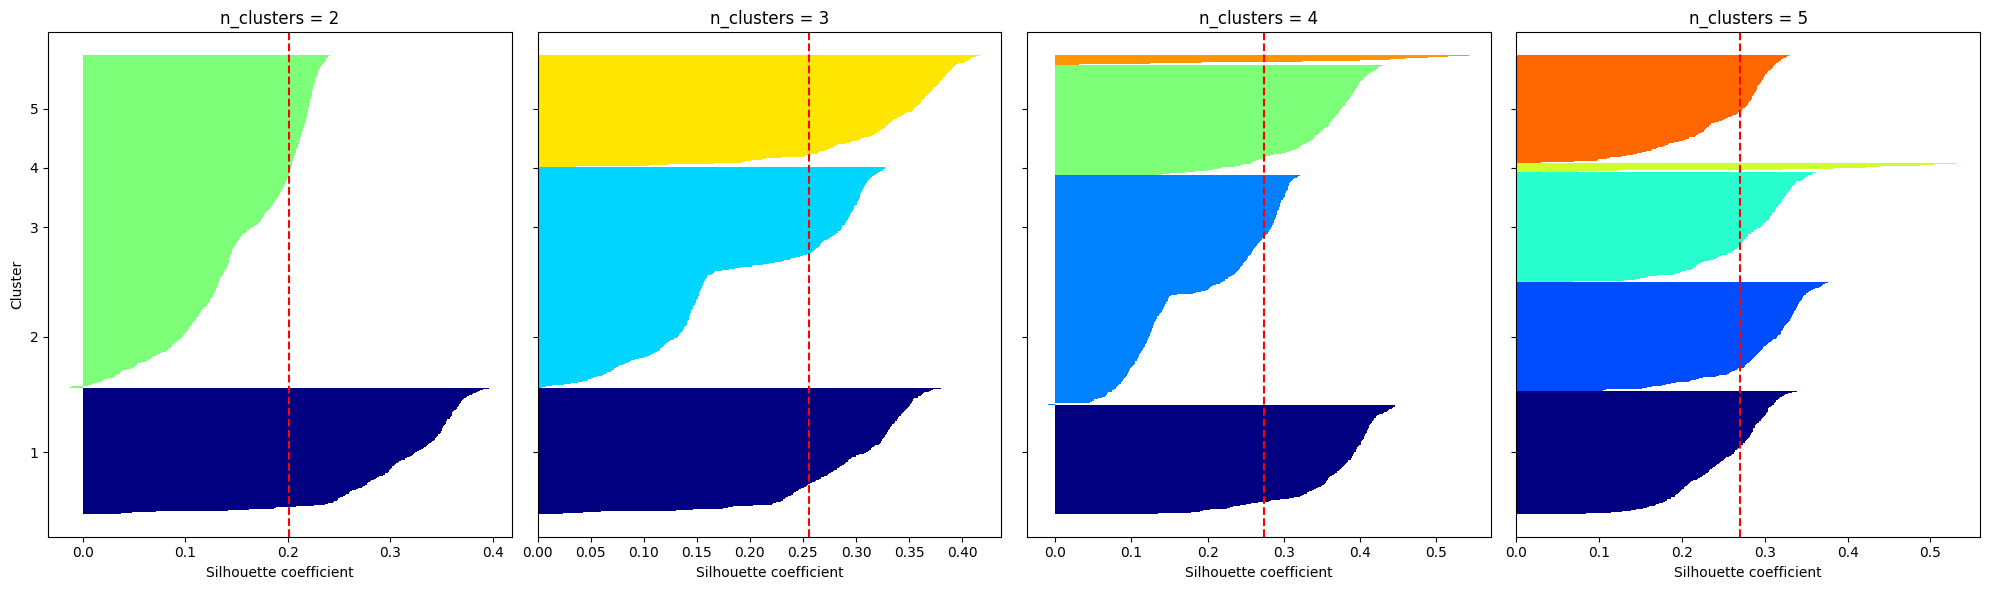

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

fig, axs = plt.subplots(1,4, figsize=(20, 6), sharey=True) 
for idx, n in enumerate([2, 3, 4,5]):
    km = KMeans(
        n_clusters=n,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=0
    )
    y_km = km.fit_predict(X_scaled)

    cluster_labels = np.unique(y_km)
    silhouette_vals = silhouette_samples(X_scaled, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n)  # n_clusters 대신 n 사용
        axs[idx].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                      edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    axs[idx].axvline(silhouette_avg, color="red", linestyle="--")
    axs[idx].set_yticks(yticks)
    axs[idx].set_yticklabels(cluster_labels + 1)
    axs[idx].set_title(f'n_clusters = {n}')
    axs[idx].set_xlabel('Silhouette coefficient')
    if idx == 0:
        axs[idx].set_ylabel('Cluster')

plt.tight_layout()

plt.show()


In [ ]:
cluster_mean = df.cluster_mean['cluster'].mean
cluster_mean

hierarchial
1. 어그로 , 각각 클러스터를 
2. 

In [ ]:
DBSCAN 